<a href="https://colab.research.google.com/github/natashayulian/bangkit-final-project/blob/master/YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-05-26<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Jun  7 01:13:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

**Connect and authorize google drive with google colab:**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [2]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3
checkpoints	     mnist	       tools
detection_custom.py  model_data        train.py
detection_demo.py    OIDv4_ToolKit     Untitled.ipynb
detect_mnist.py      README.md	       yolov3
IMAGES		     requirements.txt  YOLOv3_colab_training.ipynb


**Install all required libraries for our project:**

In [7]:
!pip install -r ./requirements.txt

  Using cached https://files.pythonhosted.org/packages/47/6a/62e288da7bcda82b935ff0c6cfe542970f04e29c756b0e147251b2fb251f/wget-3.2.zip
     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 3.1MB 19.0MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 6.2MB 42.2MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=bfcb973742c697a5b64e4d05c0843d8abcd7aa2aa1638648778c5c6e6b8ff091
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: rsa 4.0
    Uninstalling rsa-4.0:
      Successfully uninstalled rsa-4.0
  Found existing installation: botocore 1.16.19
    Uninstalling botocore-1.16.19:
      Successfully uninstalled botocore-1.16.19


**Download yolov3.weights if you don't have it:**

In [4]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2020-06-07 01:14:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   554KB/s    in 4m 55s  

2020-06-07 01:19:10 (820 KB/s) - ‘model_data/yolov3.weights’ saved [248007048/248007048]



**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.2.0
'/device:GPU:0'
```

In [0]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.2.0


'/device:GPU:0'

**Test by loading trained model:**

In [0]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

input_size = YOLO_INPUT_SIZE
Darknet_weights = YOLO_DARKNET_WEIGHTS

yolo = Create_Yolov3(input_size=input_size)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

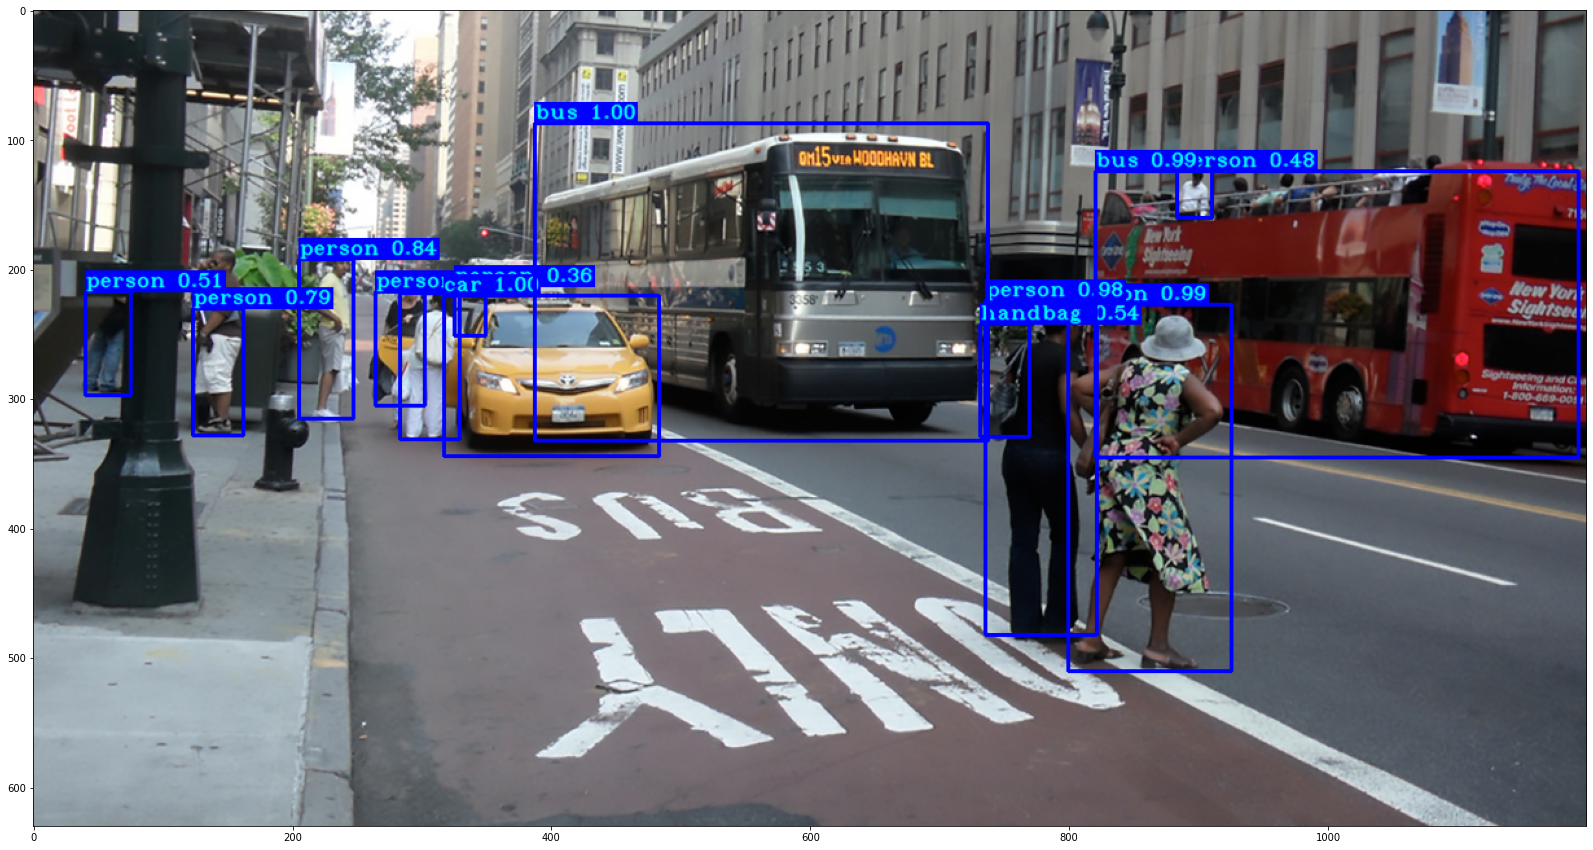

In [6]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=input_size, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [3]:
!python tools/XML_to_YOLOv3.py

Streaming output truncated to the last 5000 lines.
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Cucumber/286366a3cf6edea4.jpg 497,286,803,555,6
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Cucumber/2700ad0d32e0402e.jpg 579,56,709,499,6 728,274,1020,682,6
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Cucumber/348d773870fc5dff.jpg 40,105,273,266,6 83,245,338,394,6
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Cucumber/398ac79ec12439d6.jpg 0,229,320,529,6 0,0,954,540,6
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Cucumber/25277fe784396369.jpg 392,5,570,307,6 122,0,324,326,6
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Cucumber/25db401421bd90d6.jpg 0,569,28,703,6 0,161,239,655,6 146,84,503,586,6 454,65,744,527,6 778,236,993,465,6
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/O

**Start training custom model:**

In [0]:
from train import *
tf.keras.backend.clear_session()
main()

epoch: 0 step:    2/841, lr:0.000000, giou_loss:   7.45, conf_loss:1875.28, prob_loss:  47.63, total_loss:1930.36
epoch: 0 step:    3/841, lr:0.000000, giou_loss:   5.08, conf_loss:1931.14, prob_loss:  30.69, total_loss:1966.91
epoch: 0 step:    4/841, lr:0.000000, giou_loss:  15.85, conf_loss:1960.45, prob_loss:  92.60, total_loss:2068.89
epoch: 0 step:    5/841, lr:0.000000, giou_loss:  11.09, conf_loss:1958.53, prob_loss:  64.54, total_loss:2034.16
epoch: 0 step:    6/841, lr:0.000000, giou_loss:   9.21, conf_loss:1929.72, prob_loss:  54.26, total_loss:1993.20
epoch: 0 step:    7/841, lr:0.000000, giou_loss:   5.67, conf_loss:1953.55, prob_loss:  32.97, total_loss:1992.18
epoch: 0 step:    8/841, lr:0.000000, giou_loss:   4.99, conf_loss:1991.16, prob_loss:  31.45, total_loss:2027.60
epoch: 0 step:    9/841, lr:0.000001, giou_loss:   4.12, conf_loss:1954.70, prob_loss:  27.94, total_loss:1986.76
epoch: 0 step:   10/841, lr:0.000001, giou_loss:   5.08, conf_loss:1921.26, prob_loss:  

**Create Yolo v3 custom model and load custom trained weights**

In [0]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

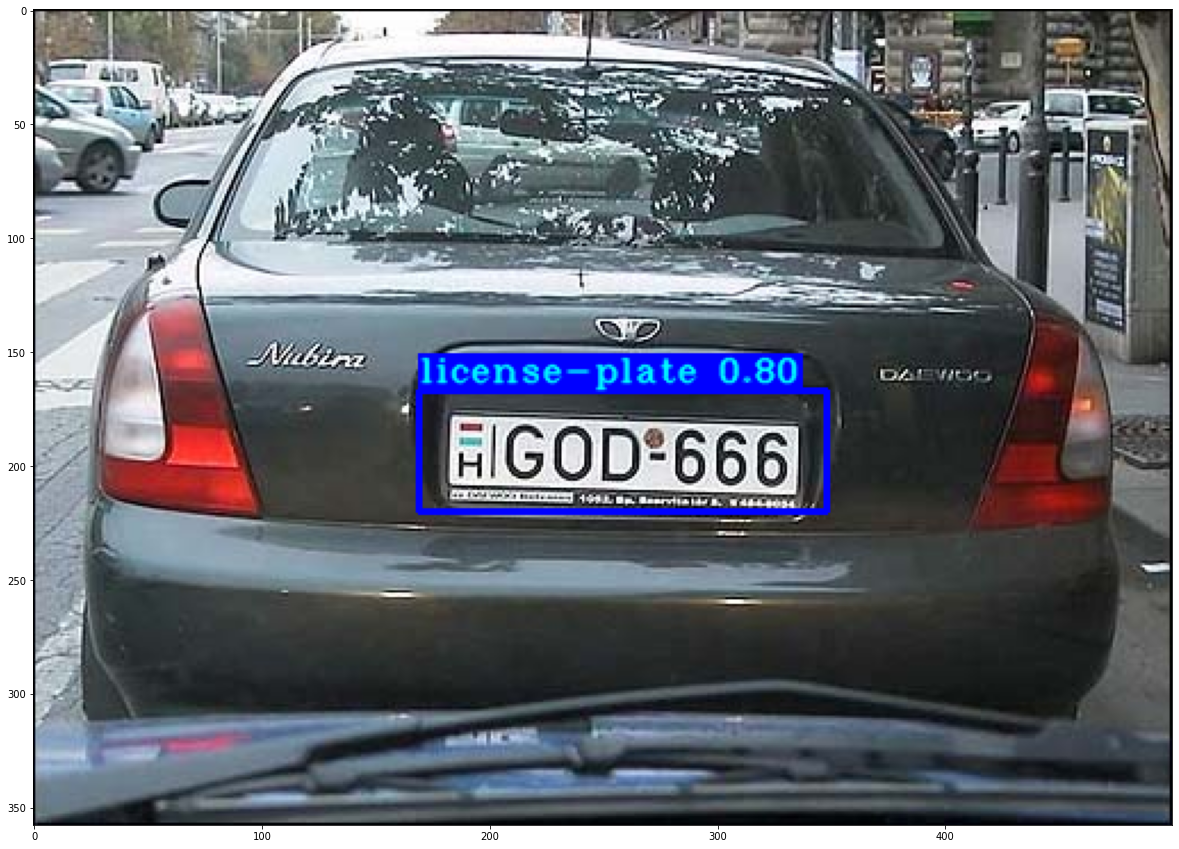

In [0]:
image_path   = "./IMAGES/plate_1.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**